# Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_nypd = pd.read_csv('https://data.cityofnewyork.us/resource/n2zq-pubd.csv?$limit=5000000')

In [20]:
df_nypd.head()

,cad_evnt_id,create_date,incident_date,incident_time,nypd_pct_cd,boro_nm,patrl_boro_nm,geo_cd_x,geo_cd_y,radio_code,typ_desc,cip_jobs,add_ts,disp_ts,arrivd_ts,closng_ts,latitude,longitude
0,99842231,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:11:38,45,BRONX,PATROL BORO BRONX,1031438,249344,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:02:04.000,2024-01-01T00:02:04.000,NaN,2024-01-01T00:13:01.000,40.850949,-73.829434
1,99842388,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:19:46,110,QUEENS,PATROL BORO QUEENS NORTH,1022087,208229,52D6,DISPUTE: FAMILY,Non CIP,2024-01-01T00:09:59.000,2024-01-01T00:11:05.000,NaN,2024-01-01T00:57:28.000,40.738144,-73.863466
2,99842587,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,22:31:06,108,QUEENS,PATROL BORO QUEENS NORTH,1007298,209993,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,2024-01-01T00:01:21.000,2024-01-01T00:02:19.000,2024-01-01T01:19:58.000,2024-01-01T01:20:02.000,40.743037,-73.916826
3,99843964,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:53:22,114,QUEENS,PATROL BORO QUEENS NORTH,1002279,222019,34K1,ASSAULT (IN PROGRESS): KNIFE/INSIDE,Critical,2024-01-01T00:06:11.000,2024-01-01T00:07:19.000,2024-01-01T00:19:27.000,2024-01-01T01:03:22.000,40.776057,-73.934906
4,99844026,2024-01-01T00:00:00.000,2023-12-31T00:00:00.000,23:57:38,66,BROOKLYN,PATROL BORO BKLYN SOUTH,987908,174328,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,2024-01-01T00:04:38.000,2024-01-01T01:45:33.000,NaN,2024-01-01T02:23:34.000,40.645174,-73.986820


In [21]:
df_nypd.shape

(305071, 18)

In [22]:
df_nypd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305071 entries, 0 to 305070
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   cad_evnt_id    305071 non-null  int64  
 1   create_date    305071 non-null  object 
 2   incident_date  305071 non-null  object 
 3   incident_time  305071 non-null  object 
 4   nypd_pct_cd    305071 non-null  int64  
 5   boro_nm        305071 non-null  object 
 6   patrl_boro_nm  305071 non-null  object 
 7   geo_cd_x       305071 non-null  int64  
 8   geo_cd_y       305071 non-null  int64  
 9   radio_code     305071 non-null  object 
 10  typ_desc       305071 non-null  object 
 11  cip_jobs       305071 non-null  object 
 12  add_ts         305071 non-null  object 
 13  disp_ts        305071 non-null  object 
 14  arrivd_ts      243610 non-null  object 
 15  closng_ts      305071 non-null  object 
 16  latitude       305071 non-null  float64
 17  longitude      305071 non-nul

In [23]:
df_nypd.isnull().sum()

cad_evnt_id          0
create_date          0
incident_date        0
incident_time        0
nypd_pct_cd          0
boro_nm              0
patrl_boro_nm        0
geo_cd_x             0
geo_cd_y             0
radio_code           0
typ_desc             0
cip_jobs             0
add_ts               0
disp_ts              0
arrivd_ts        61461
closng_ts            0
latitude             0
longitude            0
dtype: int64

In [24]:
df_nypd['boro_nm'].value_counts()

BROOKLYN         93894
MANHATTAN        82968
BRONX            59006
QUEENS           57482
STATEN ISLAND    11709
(null)              12
Name: boro_nm, dtype: int64

In [25]:
df_nypd['incident_year'] = pd.to_datetime(df_nypd['incident_date']).dt.year
df_nypd['incident_month'] = pd.to_datetime(df_nypd['incident_date']).dt.month
df_nypd['incident_hour'] = pd.to_datetime(df_nypd['incident_time'], format='%H:%M:%S').dt.hour

<Axes: ylabel='Frequency'>

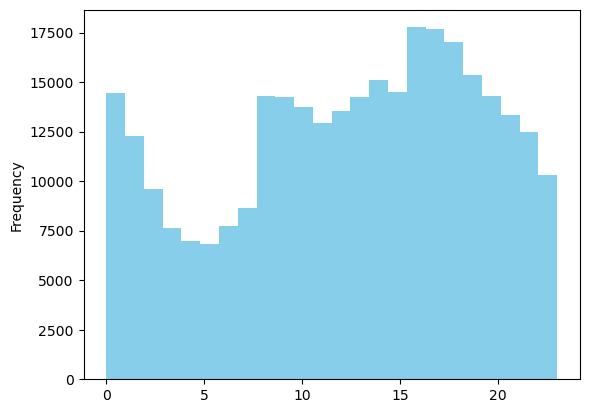

In [26]:
df_nypd['incident_hour'].plot(kind='hist', bins=24, color='skyblue')

<Axes: xlabel='day_of_week'>

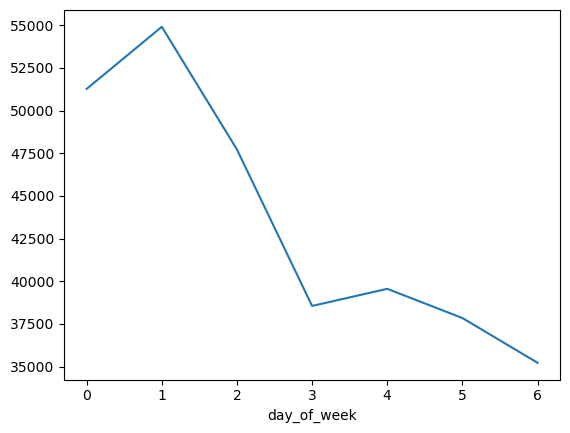

In [27]:
df_nypd['day_of_week'] = pd.to_datetime(df_nypd['incident_date']).dt.dayofweek
df_nypd.groupby('day_of_week').size().plot(kind='line')

<Axes: >

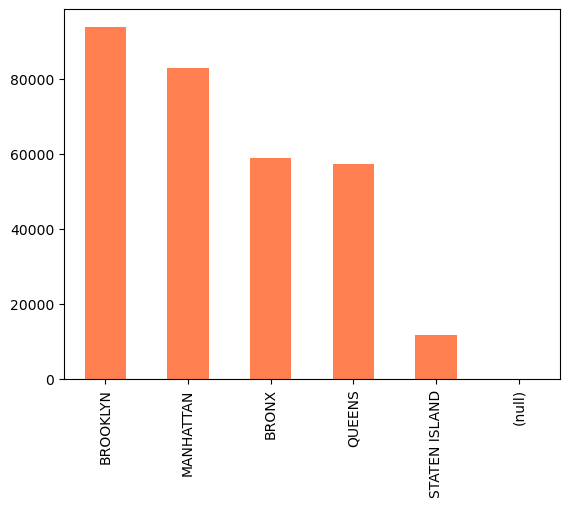

In [28]:
df_nypd['boro_nm'].value_counts().plot(kind='bar', color='coral')

<Axes: >

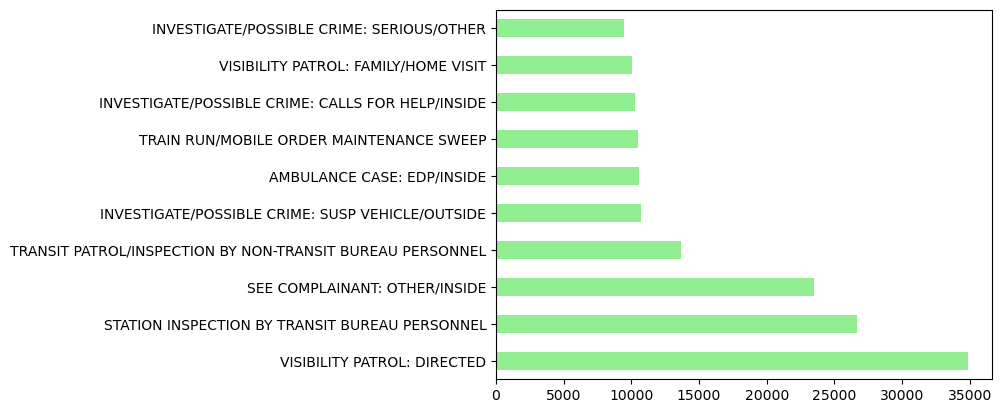

In [31]:
top_incidents = df_nypd['typ_desc'].value_counts().head(10)
top_incidents.plot(kind='barh', color='lightgreen')

<Axes: ylabel='Frequency'>

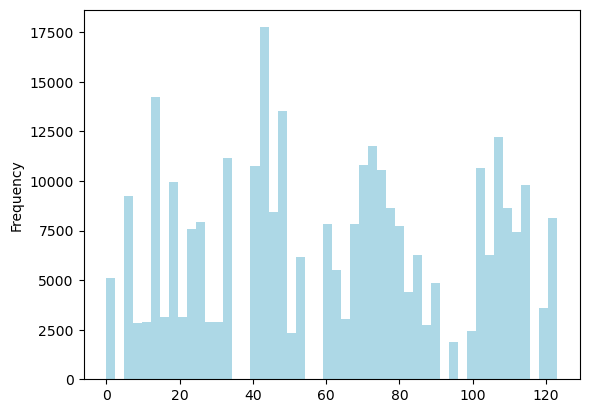

In [35]:
df_nypd['nypd_pct_cd'].plot(kind='hist', bins=50, color='lightblue')

<Axes: xlabel='typ_desc', ylabel='nypd_pct_cd'>

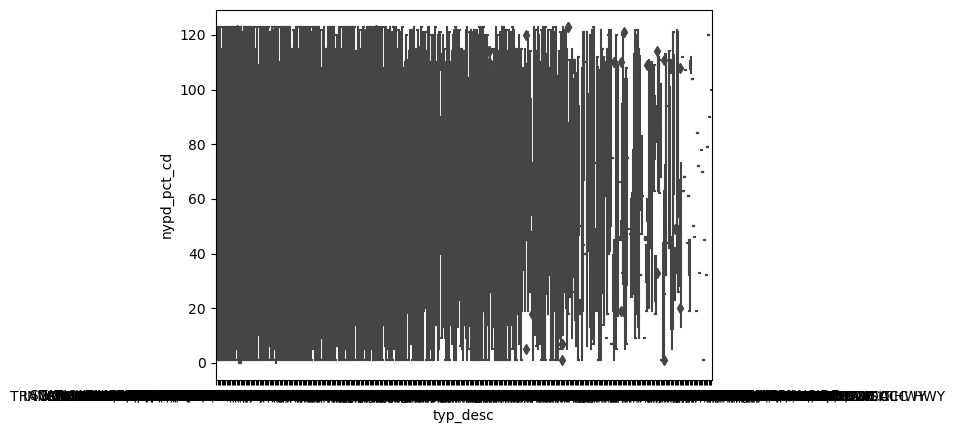

In [37]:
import seaborn as sns
sns.boxplot(x='typ_desc', y='nypd_pct_cd', data=df_nypd)

In [4]:
df_311 = pd.read_csv('https://data.cityofnewyork.us/resource/erm2-nwe9.csv$limit=5000000')

In [5]:
df_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location
0,62753713,2024-10-15T01:42:53.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11223.0,344 AVENUE X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.590520,-73.970364,"\n, \n(40.590519580029756, -73.97036396033832)"
1,62753865,2024-10-15T00:51:33.000,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10451.0,114 EAST 158 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.826142,-73.925259,"\n, \n(40.82614243932197, -73.92525911209621)"
2,62755449,2024-10-15T00:51:11.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11208.0,BLAKE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671326,-73.870926,"\n, \n(40.67132618794219, -73.87092645348676)"
3,62753089,2024-10-15T00:50:43.000,NaN,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10466.0,840 EAST 230 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.890015,-73.854389,"\n, \n(40.89001535147259, -73.85438915143514)"
4,62752241,2024-10-15T00:50:17.000,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,60 ST NICHOLAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.800886,-73.952507,"\n, \n(40.80088623075003, -73.952506889797)"


In [38]:
df_311.shape

(1000, 41)

In [41]:
df_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      1000 non-null   int64  
 1   created_date                    1000 non-null   object 
 2   closed_date                     290 non-null    object 
 3   agency                          1000 non-null   object 
 4   agency_name                     1000 non-null   object 
 5   complaint_type                  1000 non-null   object 
 6   descriptor                      990 non-null    object 
 7   location_type                   937 non-null    object 
 8   incident_zip                    994 non-null    float64
 9   incident_address                969 non-null    object 
 10  street_name                     969 non-null    object 
 11  cross_street_1                  719 non-null    object 
 12  cross_street_2                  721

In [42]:
df_311.isnull().sum()

unique_key                           0
created_date                         0
closed_date                        710
agency                               0
agency_name                          0
complaint_type                       0
descriptor                          10
location_type                       63
incident_zip                         6
incident_address                    31
street_name                         31
cross_street_1                     281
cross_street_2                     279
intersection_street_1              287
intersection_street_2              285
address_type                         5
city                                34
landmark                           340
facility_type                     1000
status                               0
due_date                           998
resolution_description             468
resolution_action_updated_date     251
community_board                      0
bbl                                 98
borough                  

In [46]:
print(df_311['descriptor'].value_counts())

Loud Music/Party                         148
ENTIRE BUILDING                          140
Banging/Pounding                          82
Blocked Hydrant                           66
Loud Talking                              57
                                        ... 
SIGNAGE MISSING                            1
Truck Route Violation                      1
Chronic                                    1
Air: Odor/Fumes, Vehicle Idling (AD3)      1
MOLD                                       1
Name: descriptor, Length: 123, dtype: int64
